In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pydataset import data
import env

%matplotlib inline

In [55]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


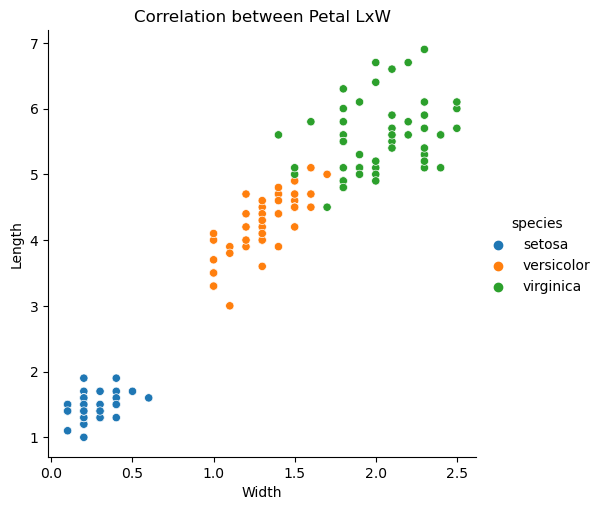

In [4]:
sns.relplot(x='petal_width', y='petal_length', hue='species', data=iris)
plt.title('Correlation between Petal LxW')
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

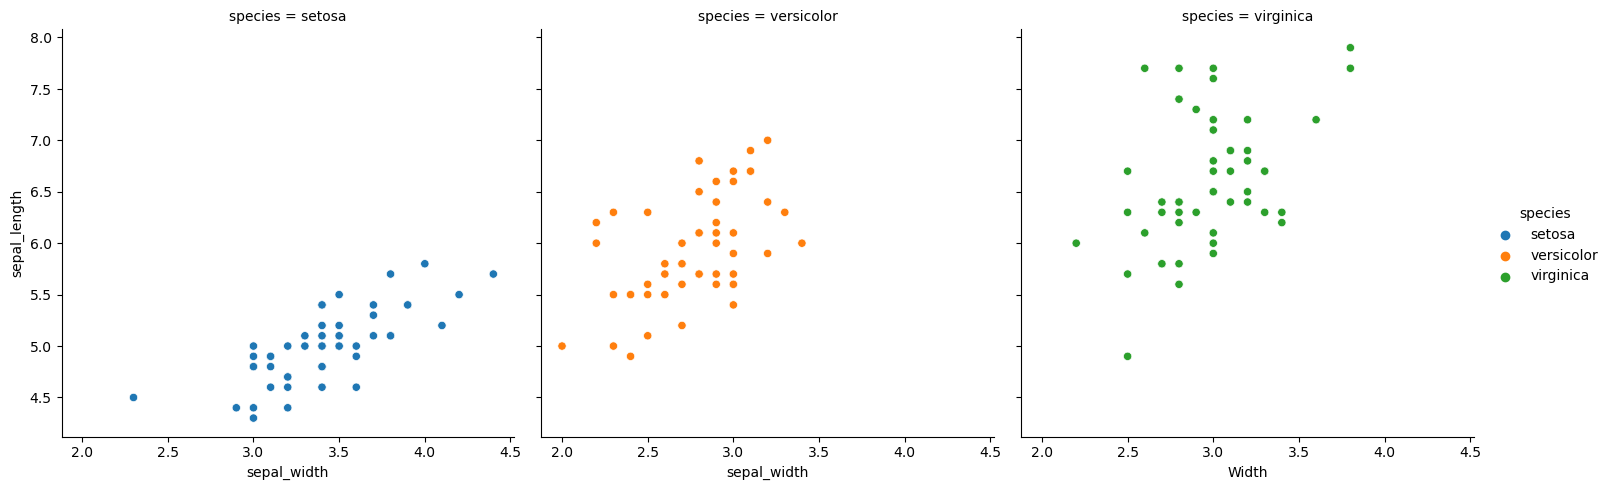

In [56]:
sns.relplot(x='sepal_width', y='sepal_length', col='species', hue='species', data=iris)

plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

- The best feature to predict species is Petal LxW as the correlation is more condensed to predict which species is each one. 

### Conclusion of Part I

### Part II

In [6]:
anascombe = sns.load_dataset('anscombe')

In [7]:
anascombe = pd.DataFrame(anascombe)
anascombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [8]:
anascombe.groupby('dataset').nunique()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,2,11


In [9]:
anascombe.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


- The above data shows //anascombe.groupby - the count of each subgroup. 

- The above data shows //anascombe.describe - the count of each row and each summary statistics.

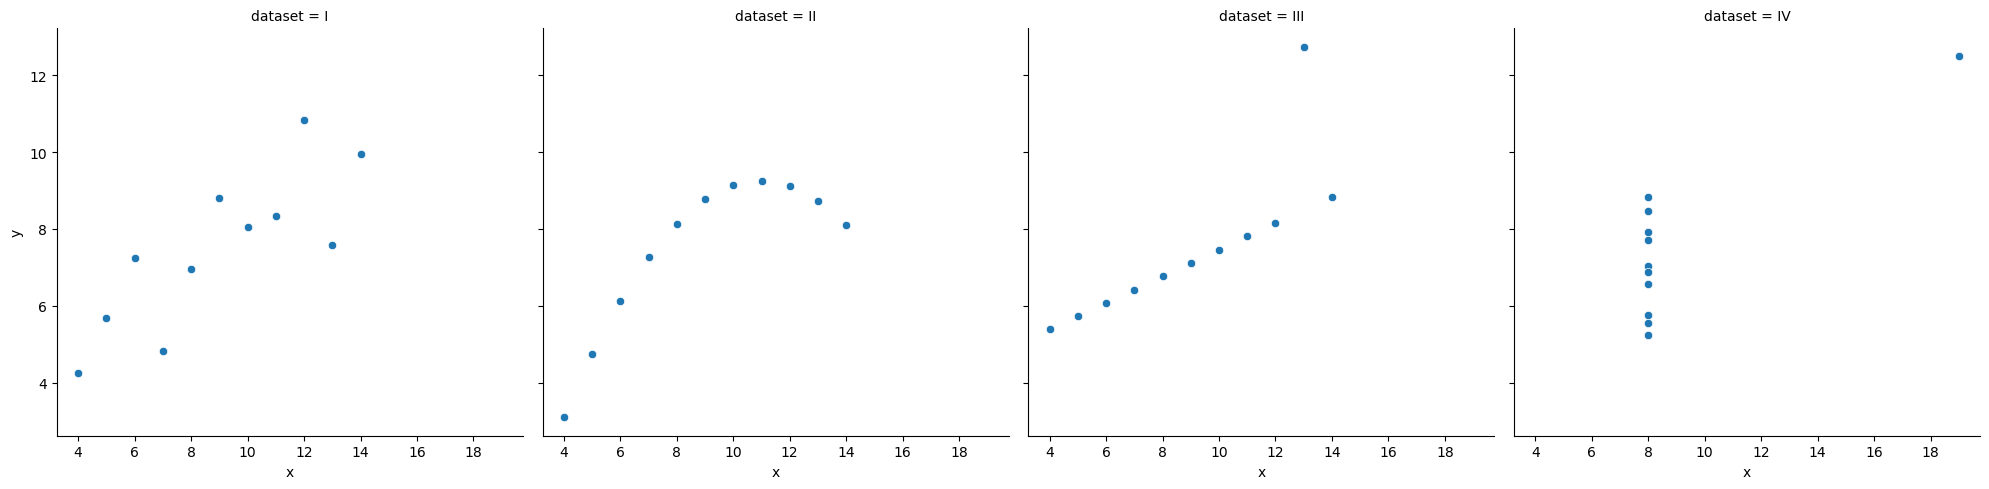

In [57]:
sns.relplot(data=anascombe, x='x', y='y', col='dataset')

plt.show()

### Conclusion of Part II

## Part III

In [11]:
insectsprays = data('InsectSprays')
insectsprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [12]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [13]:
swiss.columns

Index(['Fertility', 'Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality'],
      dtype='object')

In [14]:
is_catholic = swiss['Catholic']>75

In [15]:
is_catholic  # <75 constitutes being 'Catholic'

Courtelary      False
Delemont         True
Franches-Mnt     True
Moutier         False
Neuveville      False
Porrentruy       True
Broye            True
Glane            True
Gruyere          True
Sarine           True
Veveyse          True
Aigle           False
Aubonne         False
Avenches        False
Cossonay        False
Echallens       False
Grandson        False
Lausanne        False
La Vallee       False
Lavaux          False
Morges          False
Moudon          False
Nyone           False
Orbe            False
Oron            False
Payerne         False
Paysd'enhaut    False
Rolle           False
Vevey           False
Yverdon         False
Conthey          True
Entremont        True
Herens           True
Martigwy         True
Monthey          True
St Maurice       True
Sierre           True
Sion             True
Boudry          False
La Chauxdfnd    False
Le Locle        False
Neuchatel       False
Val de Ruz      False
ValdeTravers    False
V. De Geneve    False
Rive Droit

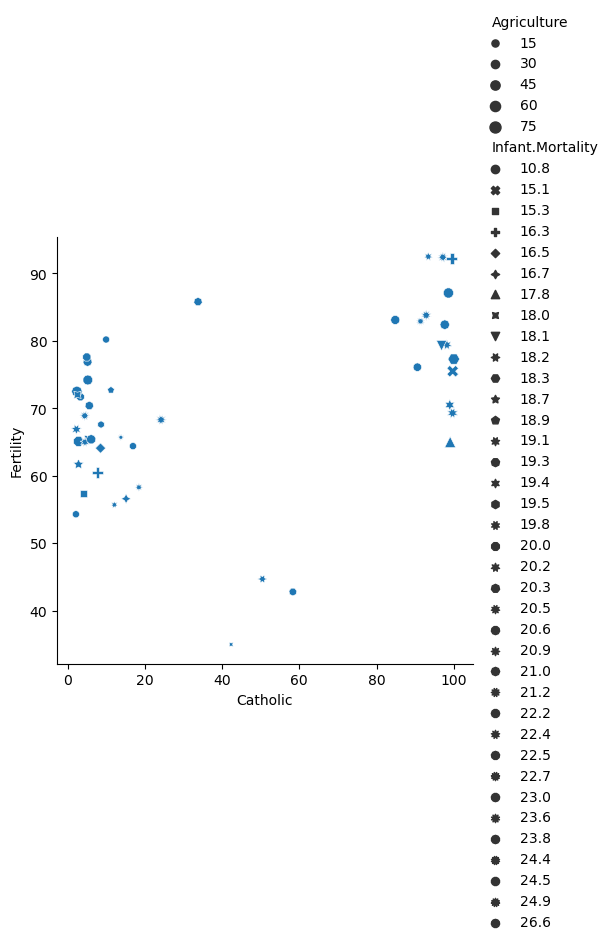

In [16]:
sns.relplot(data=swiss, x='Catholic', y='Fertility', style='Infant.Mortality', size='Agriculture')
plt.show()

- There is a correlation with fertility and catholic percentage.

- The most correlated attribute is agriculture.

In [175]:
def get_db_url(db, env_file=os.path.exists('env.py')):
    '''
    return a formatted string containing username, password,
    host and database for connecting to the mySQL server and 
    the database indicated.
    env_file checks to see if the env.py exists in cwd
    
    '''
    if env_file:
        username, password, host = (env.username, env.password, env.host)
        return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    else:
        return 'hello, you need a username and password to get in!'

In [176]:
url=get_db_url('chipotle')

In [177]:
query = '''
SELECT *
FROM orders;
'''

In [178]:
chipotle_df = pd.read_sql(query, url)
chipotle_df

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [188]:
chipotle_df['item_price'] = chipotle_df['item_price'].str.replace('$', '')
chipotle_df['item_price'] = chipotle_df['item_price'].str.replace(',', '')
chipotle_df['item_price']= chipotle_df['item_price'].astype(float)

/var/folders/51/1y9bskdx161fnwxyf68jcl540000gn/T/ipykernel_26833/3662132505.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle_df['item_price'] = chipotle_df['item_price'].str.replace('$', '')


In [189]:
chipotle_df

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",8.75


In [193]:
new_df = chipotle_df[['item_name', 'quantity', 'item_price']].groupby(['item_name']).agg(sum)

In [200]:
new_df = new_df.sort_values(['item_price'], ascending=[0]).head(4)

#### Chipotle plot data

<AxesSubplot:title={'center':'Chipotle Top4 Products and Revenue'}, xlabel='Products', ylabel='Units'>

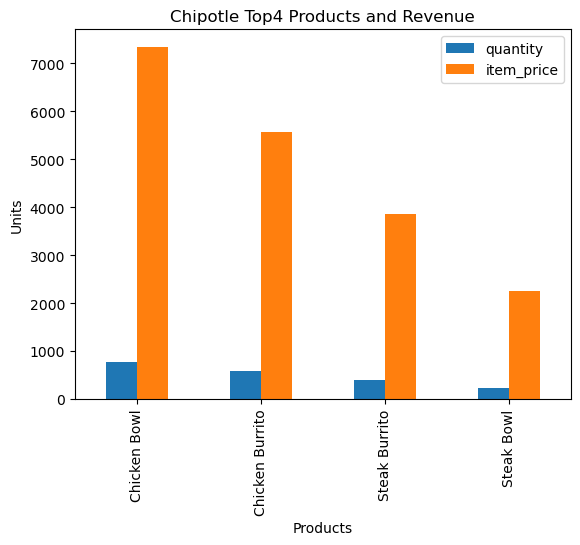

In [207]:
(new_df.plot.bar(title='Chipotle Top4 Products and Revenue',
                rot=90,
                ylabel= 'Units',
                xlabel= 'Products')

)

In [209]:
sleepstudy= data('sleepstudy')

<AxesSubplot:>

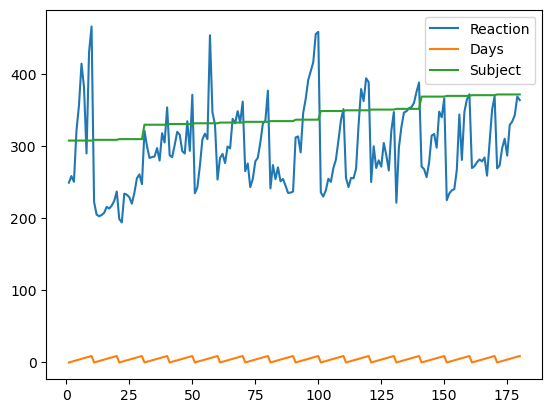

In [210]:
sleepstudy.plot()